In [2]:
import xml.etree.ElementTree as ET
import json
import os
import sys
import cv2
import matplotlib.pyplot as plt


In [3]:
class JaguarAnnotationParser:
    def __init__(self, filename):
        self.filename = filename

    def parse(self):
        self.root = ET.parse(self.filename).getroot()

    def getBoundingBoxes(self):
        bboxes = []
        for bbox in self.root.iter('bndbox'):
            box = []
            for point in bbox:
                box.append(int(point.text))
            bboxes.append(box)
        return bboxes

    def getImageFileName(self):
        return os.path.dirname(self.filename) \
                + '/../' \
                + os.path.basename(self.filename).split('.')[0] \
                + '.jpg'

    def getWidth(self):
        return int(self.root.find('size')[0].text)

    def getHeight(self):
        return int(self.root.find('size')[1].text)

    def getClassName(self):
        return 'jaguar'


In [4]:
folder = 'jaguars/annotations'
files = ['{}/{}'.format(folder, x.strip()) for x in os.listdir(folder)]

In [5]:
n = min(1, len(files))
files = files[:n]
n = len(files)

(1536, 2048, 3)
1264 457 1605 681


ValueError: zero-size array to reduction operation minimum which has no identity

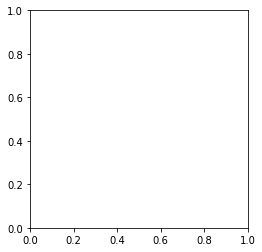

In [6]:
result = {}
for file in files:
    obj = JaguarAnnotationParser(file)
    obj.parse()
    image = cv2.imread(obj.getImageFileName())
    print(image.shape)
    bboxes = obj.getBoundingBoxes()
    fig,axes = plt.subplots(len(bboxes))
    if len(bboxes) == 1:
        axes = [axes]

    for i in range(len(bboxes)):
        box = bboxes[i]
        print(box[0], box[1], box[2], box[3])
        axes[i].imshow(image[box[1]:box[3]][box[0]:box[2]])
    plt.show()


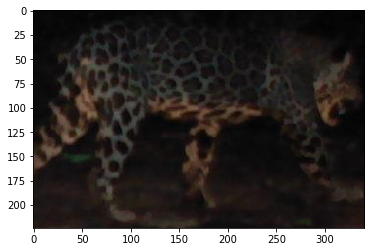

In [15]:
plt.imshow(image[457:681, 1264:1605 :])